# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
from sklearn.datasets import load_diabetes
import pandas as pd

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [2]:
diab = load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [3]:
diab.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [4]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:
10 variables
- Age
- Sex
- Body mass index
- Average blood pressure
- S1
- S2
- S3
- S4
- S5
- S6


Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [5]:
diab['data'].shape

# 442 rows 
# 10 columns

(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [6]:
from sklearn.linear_model import LinearRegression

Initialize the model in the variable `diabetes_model`

In [7]:
diab_model = LinearRegression()

In [8]:
X = diab['data']
y = diab['target']

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [9]:
diab_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#Coeficientes del modelo
diab_model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
# Intercepto del modelo
diab_model.intercept_

152.1334841628965

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [12]:
import statsmodels.api as sm


X_ = sm.add_constant(diab['data'])
y_ = diab['target']

In [13]:
model = sm.OLS(y_, X_)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.83e-62
Time:                        22:44:35   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [14]:
auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [15]:
auto.head()

mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   
3  16.0          8         304.0        150.0    3433          12.0   
4  17.0          8         302.0        140.0    3449          10.5   

   model_year                       car_name  
0          70  \t"chevrolet chevelle malibu"  
1          70          \t"buick skylark 320"  
2          70         \t"plymouth satellite"  
3          70              \t"amc rebel sst"  
4          70                \t"ford torino"

Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horse_power     392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [17]:
auto['car_name'] = auto['car_name'].apply(lambda x: x.replace('"','').replace("\t", ''))

What is the newest model year and the oldest model year?

In [18]:
print(f"Oldest Model Year: {auto['model_year'].min()}̣\nNewest Model Year: {auto['model_year'].max()}̣")

Oldest Model Year: 70̣
Newest Model Year: 82̣


Check the dataset for missing values and remove all rows containing at least one missing value.

In [19]:
auto.isnull().any(axis=1).value_counts()

False    392
True       6
dtype: int64

In [20]:
auto.dropna( inplace=True)

In [21]:
auto.isnull().any(axis=1).value_counts()

False    392
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [22]:
auto['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [23]:
# 5 possible values for cylinders variable --> 4, 8, 6, 5 or 3 cylinders a car may have

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
auto.drop("car_name", axis=1, inplace=True)
auto.head(3)

mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   

   model_year  
0          70  
1          70  
2          70

In [26]:
y = auto['mpg']
X = auto.loc[:, auto.columns != 'mpg']

In [27]:
#comprobando matriz X
X.head(3)

cylinders  displacement  horse_power  weight  acceleration  model_year
0          8         307.0        130.0    3504          12.0          70
1          8         350.0        165.0    3693          11.5          70
2          8         318.0        150.0    3436          11.0          70

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [29]:
auto_linreg_model = LinearRegression()

Next, fit the model in the cell below.

In [30]:
auto_linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
auto_linreg_model.coef_

array([-0.58028475,  0.00759436,  0.00677108, -0.00664756,  0.12356183,
        0.77786492])

In [32]:
auto_linreg_model.intercept_

-16.867574739728838

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [33]:
y_pred = auto_linreg_model.predict(X_test)

In [34]:
from sklearn import metrics

metrics.r2_score(y_test, y_pred)

0.820795828579714

In [35]:
preds = pd.DataFrame({'Real_MPG': y_test, 'Predicted_MPG': y_pred}).reset_index(drop=True)
preds

Real_MPG  Predicted_MPG
0       33.0      30.431076
1       18.0      18.298535
2       28.0      29.033237
3       14.0      11.208167
4       25.0      28.004396
..       ...            ...
74      28.0      30.890860
75      26.4      27.857525
76      21.0      20.472632
77      29.0      31.382126
78      15.0      12.684560

[79 rows x 2 columns]

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

preds.head(25).plot(kind='bar',figsize=(12,8))
plt.xlabel("No. de Observacion", fontsize=20)
plt.ylabel("Predicted MPG", fontsize=20);

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [37]:
##hecho arriba

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [38]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X,y,test_size=0.1)

Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [39]:
auto_model09 = LinearRegression()
auto_model09.fit(X_train09, y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Compute the predicted values and r squared score for our new model and new sample data.

In [40]:
y_pred09 = auto_model09.predict(X_test09)

In [41]:
preds09 = pd.DataFrame({'Real_MPG': y_test09, 'Predicted_MPG': y_pred09}).reset_index(drop=True)
preds09.head(15)

Real_MPG  Predicted_MPG
0       27.4      27.518713
1       16.0      13.703557
2       19.2      21.200166
3       19.8      25.825923
4       18.6      20.881369
5       18.0      18.545202
6       20.3      25.794302
7       16.0      19.661728
8       28.8      27.801272
9       25.0      23.369952
10      36.0      33.918621
11      21.0      21.742215
12      23.9      28.877868
13      22.0      25.456773
14      16.0      11.154178

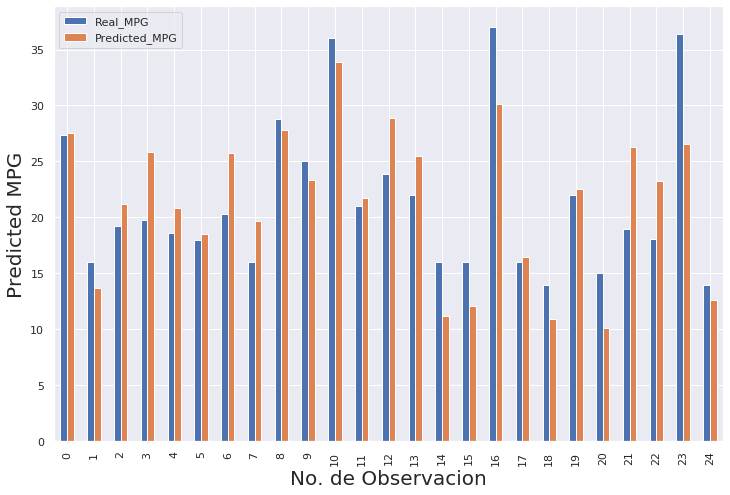

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

preds09.head(25).plot(kind='bar',figsize=(12,8))
plt.xlabel("No. de Observacion", fontsize=20)
plt.ylabel("Predicted MPG", fontsize=20);

In [43]:
metrics.r2_score(y_test09, y_pred09)

0.6109175668064255

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [44]:
metrics.r2_score(y_test, y_pred)

0.820795828579714

In [45]:
## No existe un improvement del modelo con 90% de test

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [46]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [47]:
#estimator = SVR(kernel="linear")
rfe_model = RFE(auto_linreg_model, n_features_to_select=3)

In [48]:
selector = rfe_model.fit(X, y)

Fit the model and print the ranking

In [49]:
selector.ranking_

array([1, 2, 4, 3, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [50]:
X_ = X[['cylinders', 'acceleration', 'model_year']]

In [51]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.2)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [52]:
auto_model_reduced = LinearRegression()

In [53]:
auto_model_reduced.fit(X_train_, y_train_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred_ = auto_model_reduced.predict(X_test_)

In [55]:
metrics.r2_score(y_test_, y_pred_)

0.6974063045299388

In [ ]:
# No mejoro el score de R2